In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import time

import warnings
warnings.filterwarnings("ignore")

#Sets the plots to be displayed and saved in notebook
%matplotlib inline 
plt.rcParams["figure.figsize"] = (12,7)


# (A)

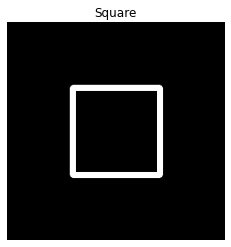

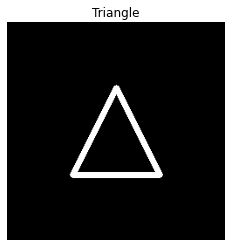

In [2]:
##Cretes a 100x100 size square in a 250x250 cell 
sq = np.zeros(shape = [250,250])##Creates a 250x250 background
cv2.rectangle(sq,pt1=(75,75),pt2=(175,175),color=255,thickness = 5) ##Adds a square to the background
plt.imshow(sq,cmap = cm.Greys_r) ##Displays the image
plt.axis('off')
plt.title('Square')
plt.show()

##Cretes a equilateral triangle of side 100 in a 250x250 cell 
tri = np.zeros(shape = [250,250])##Creates a 250x250 background
cv2.polylines(tri,[np.array([[75,175],[175,175],[125,75]],np.int32).reshape((-1,1,2))],True,color=255,thickness = 5) ##Adds a triangle to the background
plt.imshow(tri,cmap = cm.Greys_r)##Displays the image
plt.axis('off')
plt.title('Triangle')
plt.show()

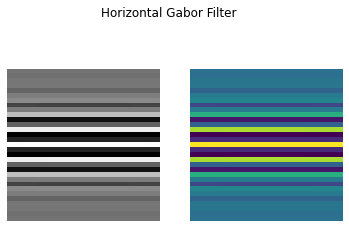

In [3]:
##Parameters size , sigma , angle, wavelength , spatial ratio , phase offset
fig, ax = plt.subplots(1,2)
fig.suptitle('Horizontal Gabor Filter')
ghori = cv2.getGaborKernel((31,31),5,np.pi/2,np.pi,0.05,0)
ax[0].imshow(ghori, cmap = cm.Greys_r)
ax[0].axis('off')
ax[1].imshow(ghori)
ax[1].axis('off')
print()

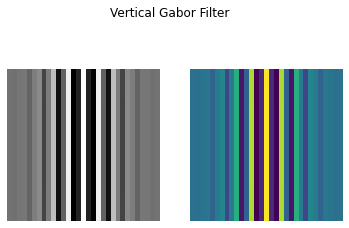

In [4]:

fig, ax = plt.subplots(1,2)
fig.suptitle('Vertical Gabor Filter')
gverti = cv2.getGaborKernel((31,31),5,0,np.pi,0.05,0)
ax[0].imshow(gverti, cmap = cm.Greys_r)
ax[0].axis('off')
ax[1].imshow(gverti)
ax[1].axis('off')
print()

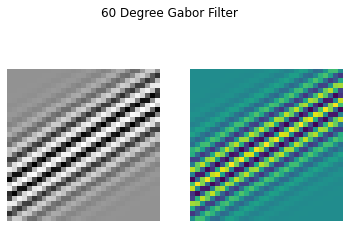

In [5]:

fig, ax = plt.subplots(1,2)
fig.suptitle('60 Degree Gabor Filter')
g60 = cv2.getGaborKernel((31,31),5,np.pi/3,np.pi,0.05,0)
ax[0].imshow(g60, cmap = cm.Greys_r)
ax[0].axis('off')
ax[1].imshow(g60)
ax[1].axis('off')
print()

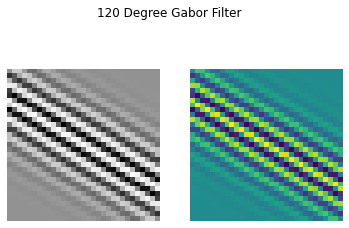

In [6]:

fig, ax = plt.subplots(1,2)
fig.suptitle('120 Degree Gabor Filter')
g120 = cv2.getGaborKernel((31,31),5,np.pi/1.5,np.pi,0.05,0)
ax[0].imshow(g120, cmap = cm.Greys_r)
ax[0].axis('off')
ax[1].imshow(g120)
ax[1].axis('off')
print()

## Horizontal Gabor Filter

2 1 1


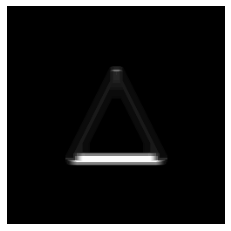

2 1 2


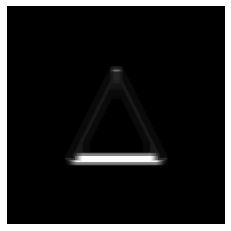

2 1 3


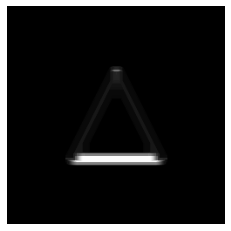

2 3 1


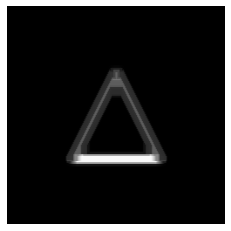

2 3 2


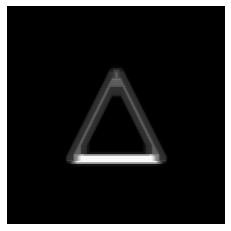

2 3 3


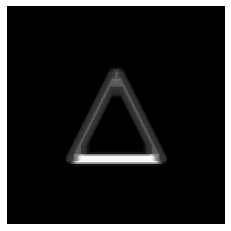

2 5 1


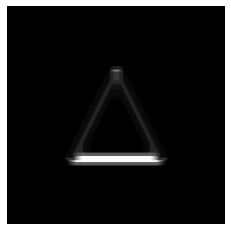

2 5 2


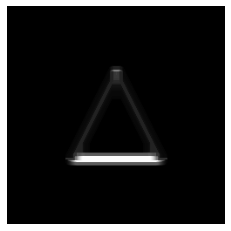

2 5 3


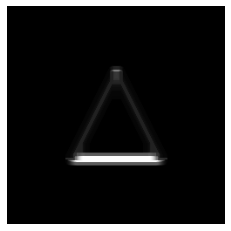

3 1 1


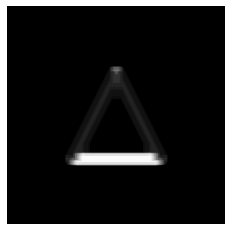

3 1 2


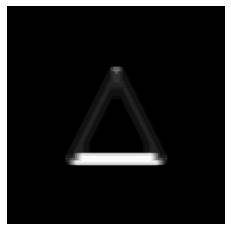

3 1 3


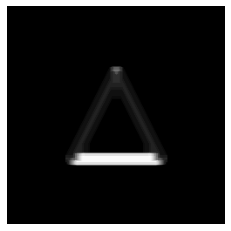

3 3 1


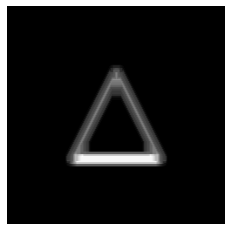

3 3 2


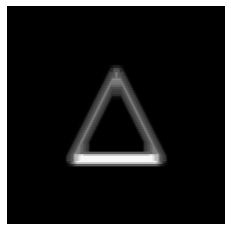

3 3 3


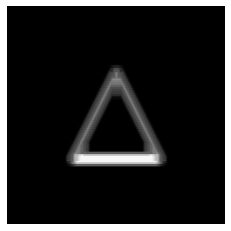

3 5 1


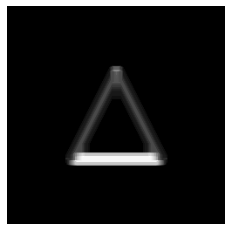

3 5 2


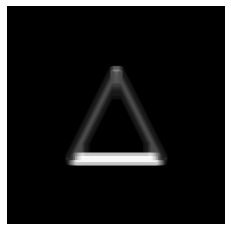

3 5 3


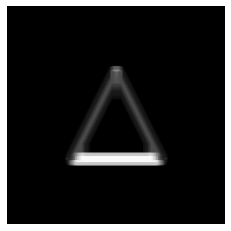

4 1 1


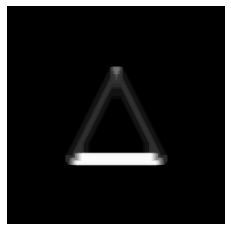

4 1 2


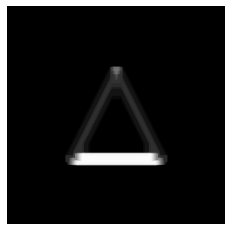

4 1 3


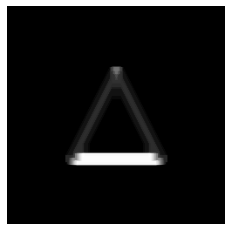

4 3 1


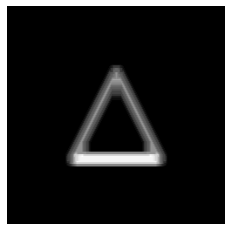

4 3 2


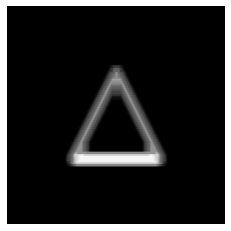

4 3 3


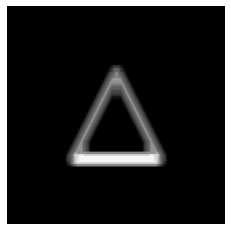

4 5 1


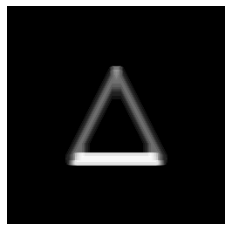

4 5 2


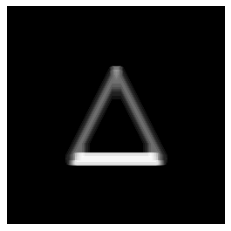

4 5 3


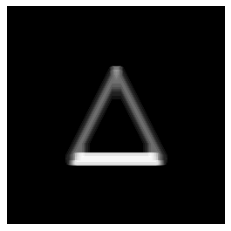

In [7]:
##Below Code is used for Parameter tuning
for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,np.pi/2,lamda*np.pi/4,0.1*gamma,0) ##Generates a filter
            res = cv2.filter2D(tri,-1,kernel=f) ##Applies filter on the image
            res = cv2.dilate(res,kernel=np.ones((11,11)))##Smoothens the image
            res = cv2.erode(res,kernel=np.ones((11,11)))##Sharpens the image
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()


2 1 1


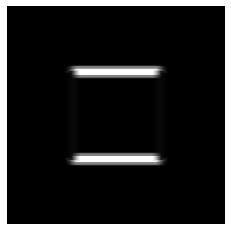

2 1 2


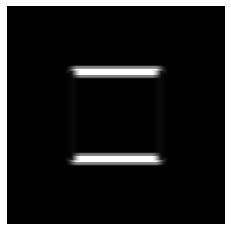

2 1 3


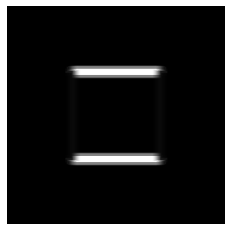

2 3 1


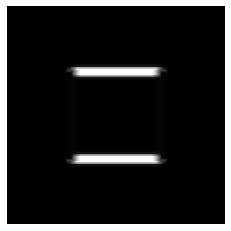

2 3 2


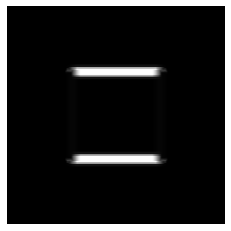

2 3 3


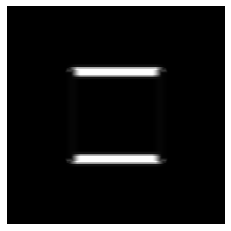

2 5 1


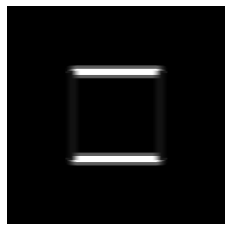

2 5 2


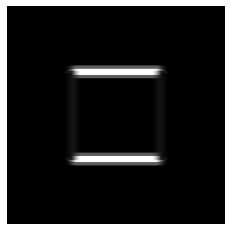

2 5 3


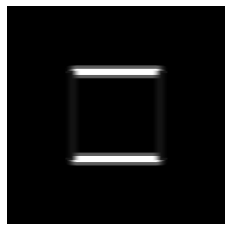

3 1 1


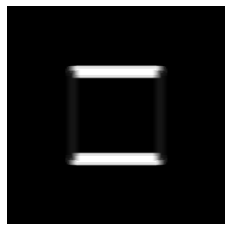

3 1 2


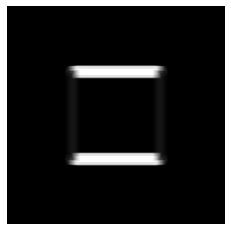

3 1 3


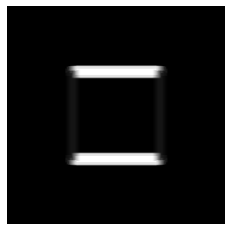

3 3 1


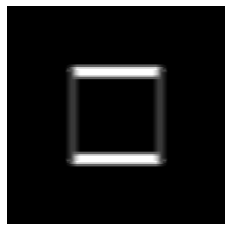

3 3 2


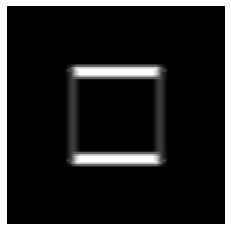

3 3 3


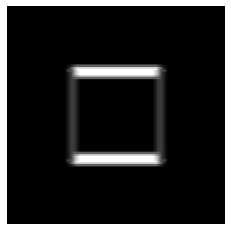

3 5 1


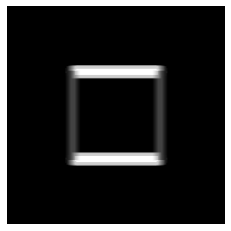

3 5 2


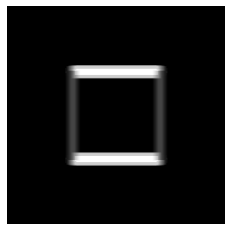

3 5 3


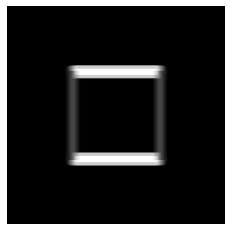

4 1 1


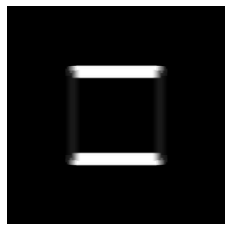

4 1 2


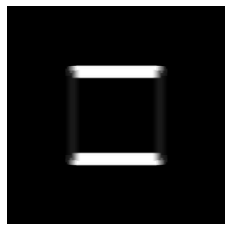

4 1 3


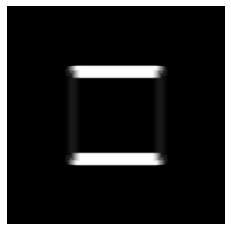

4 3 1


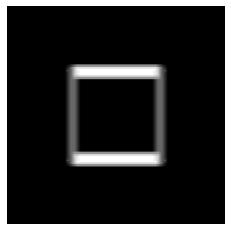

4 3 2


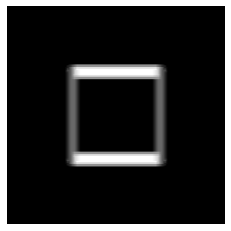

4 3 3


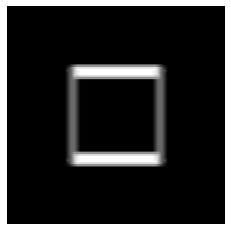

4 5 1


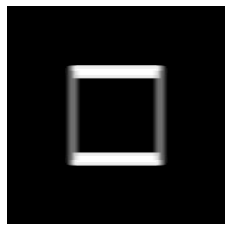

4 5 2


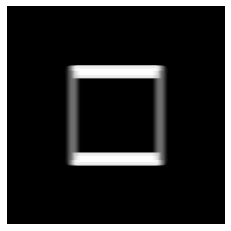

4 5 3


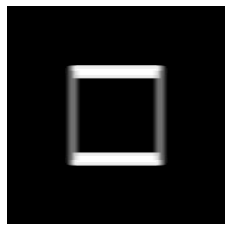

In [8]:


for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,np.pi/2,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(sq,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()

$\large{ \text{For Horizontal line detection, we get pretty good detection with Gabor filter with parameters as size of 11x11, }\\ \sigma = 2 , \lambda = 1 , \gamma = 3 , \theta = \frac{\pi}{2},  \psi = 0 }$

## Vertical Gabor Filter

2 1 1


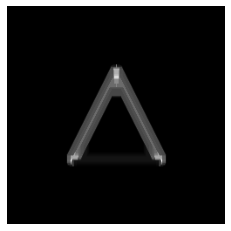

2 1 2


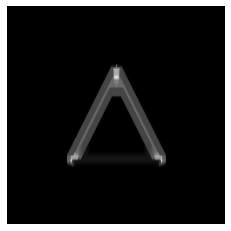

2 1 3


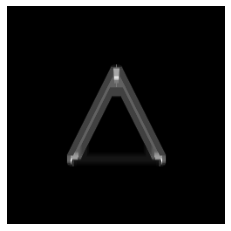

2 3 1


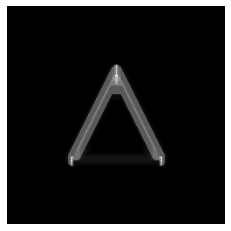

2 3 2


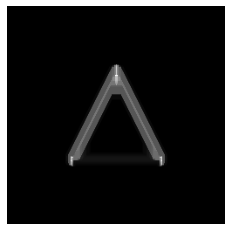

2 3 3


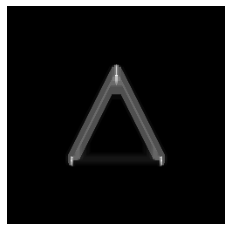

2 5 1


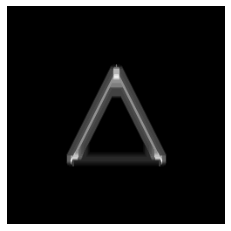

2 5 2


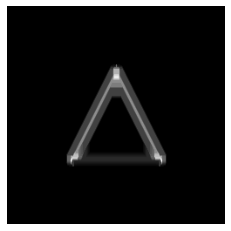

2 5 3


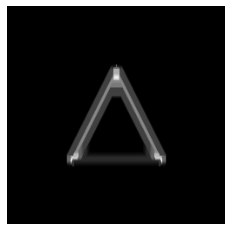

3 1 1


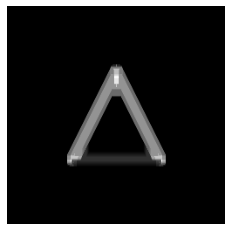

3 1 2


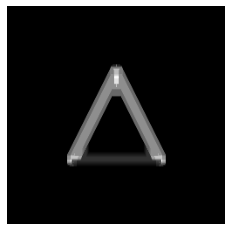

3 1 3


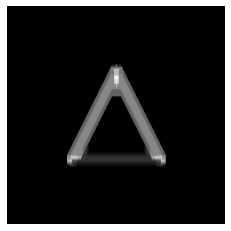

3 3 1


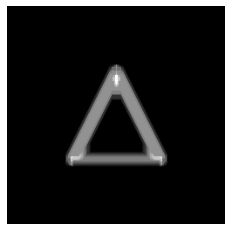

3 3 2


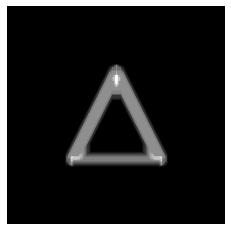

3 3 3


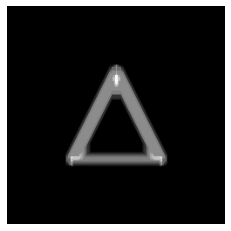

3 5 1


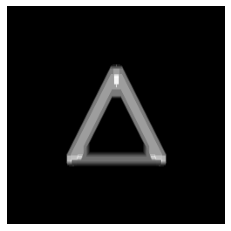

3 5 2


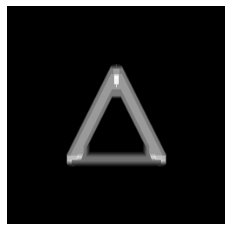

3 5 3


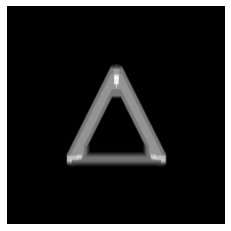

4 1 1


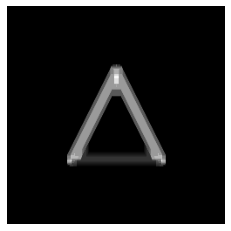

4 1 2


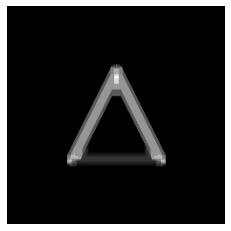

4 1 3


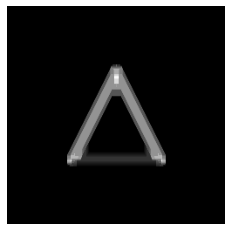

4 3 1


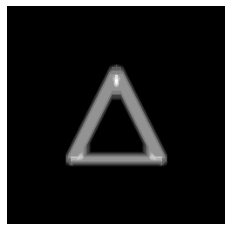

4 3 2


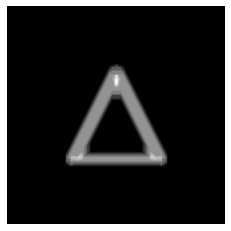

4 3 3


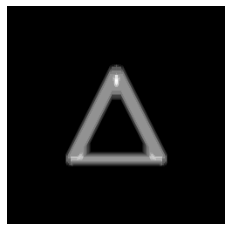

4 5 1


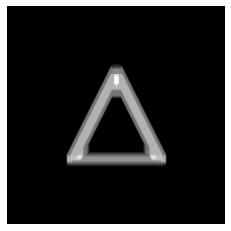

4 5 2


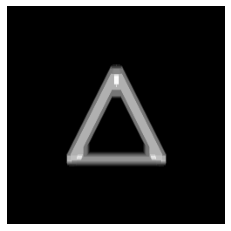

4 5 3


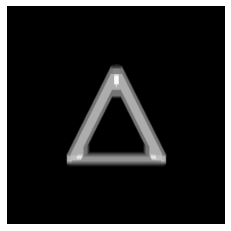

In [9]:

for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,0,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(tri,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()


2 1 1


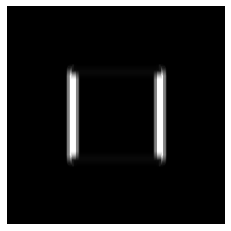

2 1 2


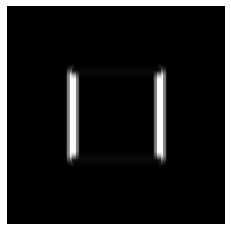

2 1 3


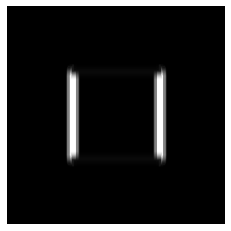

2 3 1


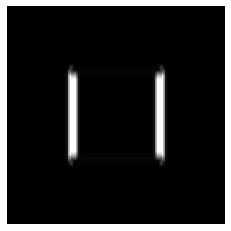

2 3 2


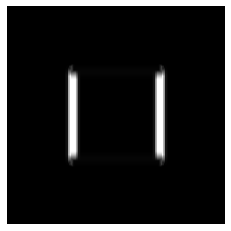

2 3 3


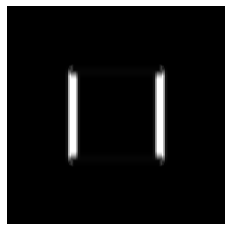

2 5 1


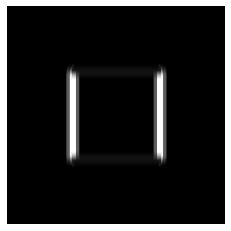

2 5 2


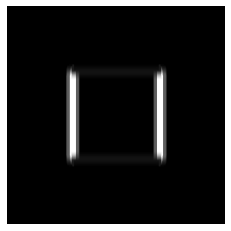

2 5 3


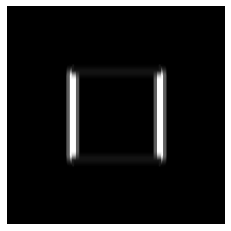

3 1 1


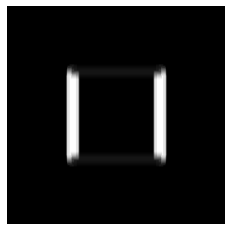

3 1 2


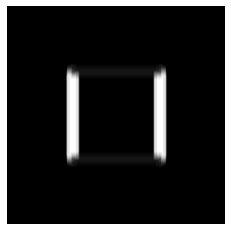

3 1 3


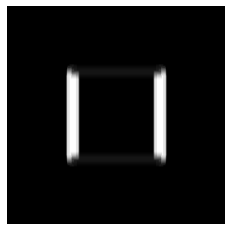

3 3 1


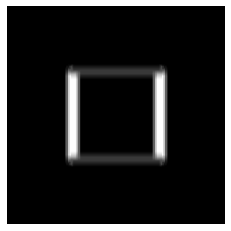

3 3 2


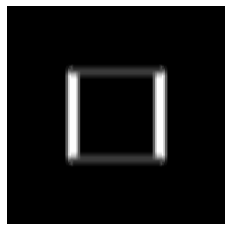

3 3 3


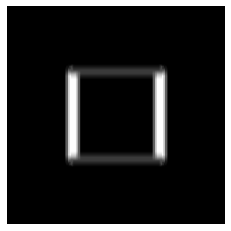

3 5 1


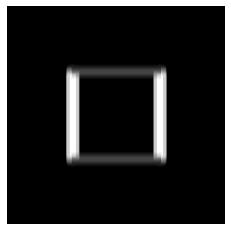

3 5 2


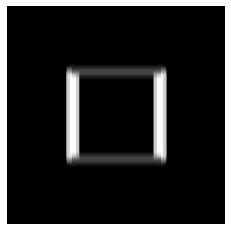

3 5 3


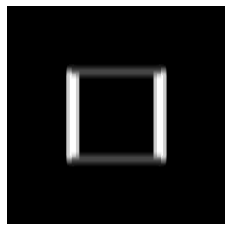

4 1 1


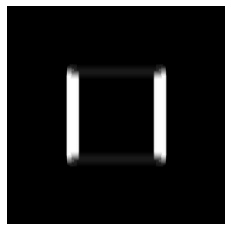

4 1 2


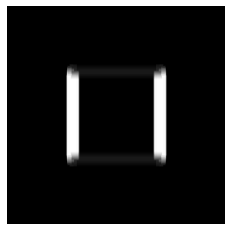

4 1 3


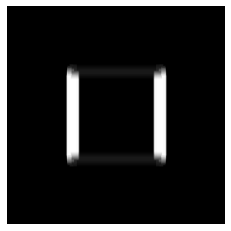

4 3 1


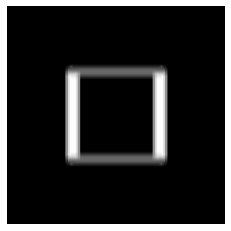

4 3 2


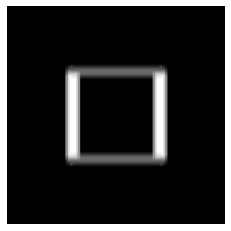

4 3 3


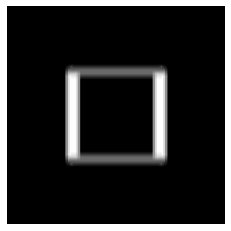

4 5 1


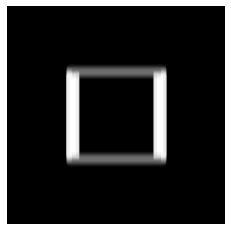

4 5 2


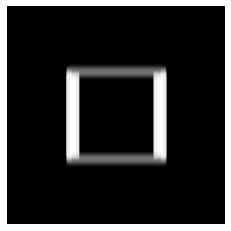

4 5 3


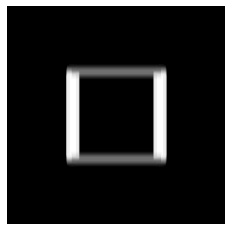

In [10]:

for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,0,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(sq,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()

$\large{ \text{For Vertical line detection, we get pretty good detection with Gabor filter with parameters as size of 11x11, }\\ \sigma = 2 , \lambda = 5 , \gamma = 1 , \theta = 0,  \psi = 0 }$

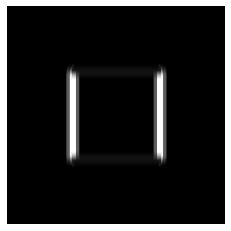

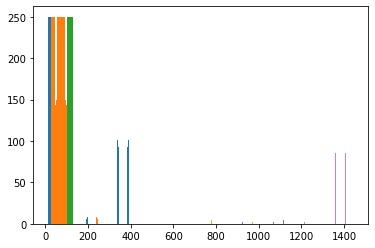

In [11]:
##Below Code is used to find suitable threshold value

k = np.ones((11,11))/121
f = cv2.getGaborKernel((11,11),2,0,5*np.pi/4,0.1*1,0)
ressq = cv2.filter2D(sq,-1,kernel=f)

ressq = cv2.dilate(ressq,kernel=k)

ressq = cv2.erode(ressq,kernel=k)

plt.axis('off')
plt.imshow(ressq,cmap = cm.Greys_r)
plt.show()


plt.hist(ressq)
plt.show()
# np.unique(ressq)

##sum(ressq.reshape(-1))/sum(sq.reshape(-1))

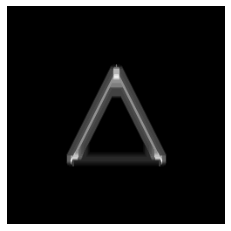

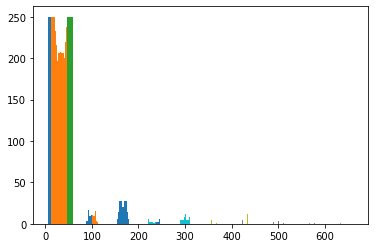

In [12]:
k = np.ones((11,11))/121
f = cv2.getGaborKernel((11,11),2,0,5*np.pi/4,0.1*1,0)
restri = cv2.filter2D(tri,-1,kernel=f)

restri = cv2.dilate(restri,kernel=k)

restri = cv2.erode(restri,kernel=k)

plt.axis('off')
plt.imshow(restri,cmap = cm.Greys_r)
plt.show()

plt.hist(restri)
plt.show()

##sum(restri.reshape(-1))/sum(tri.reshape(-1))

### As can be seen from above two histograms value above 600 can be used as a threshold

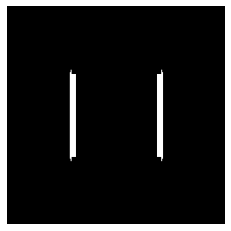

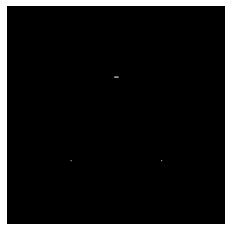

In [13]:
##Applies the threshold on two resultant images and observes the effect
ressq[ressq<600]=0
ressq[ressq>0]=255
plt.axis('off')
plt.imshow(ressq,cmap = cm.Greys_r)
plt.show()

restri[restri<600]=0
restri[restri>0]=255

plt.axis('off')
plt.imshow(restri,cmap = cm.Greys_r)
plt.show()

## 60 Degree Gabor Filter

2 1 1


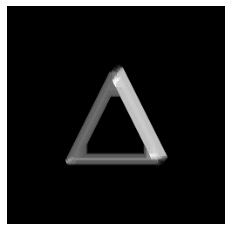

2 1 2


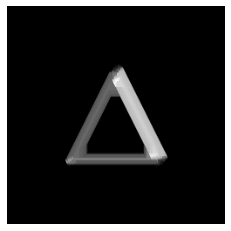

2 1 3


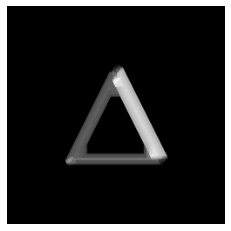

2 3 1


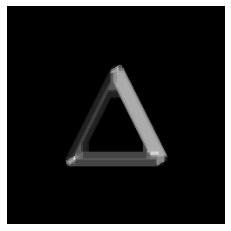

2 3 2


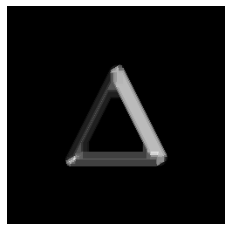

2 3 3


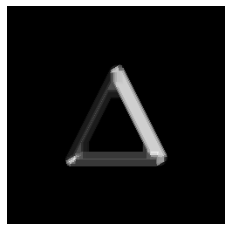

2 5 1


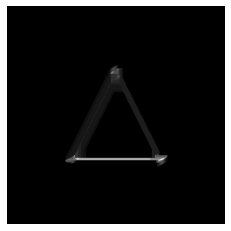

2 5 2


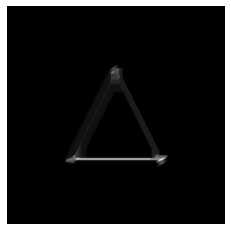

2 5 3


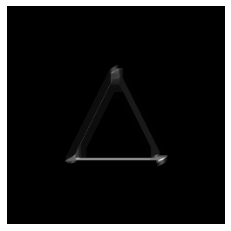

3 1 1


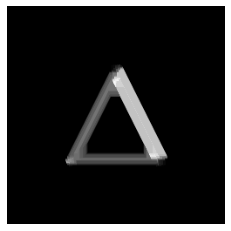

3 1 2


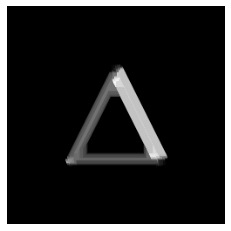

3 1 3


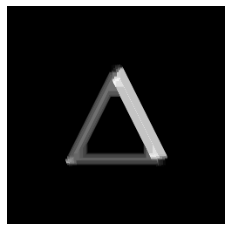

3 3 1


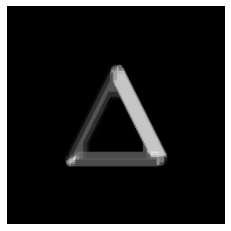

3 3 2


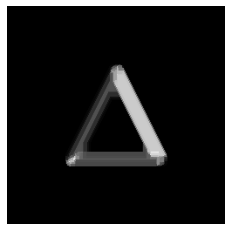

3 3 3


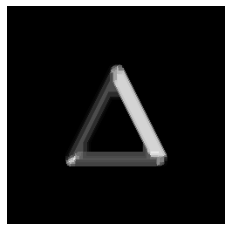

3 5 1


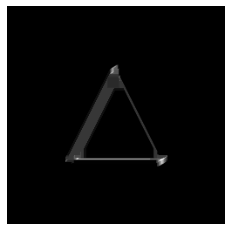

3 5 2


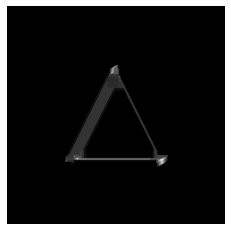

3 5 3


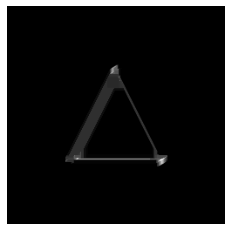

4 1 1


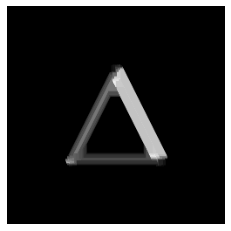

4 1 2


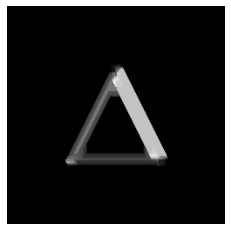

4 1 3


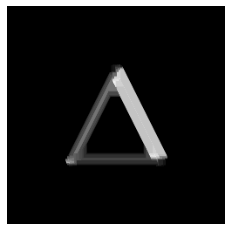

4 3 1


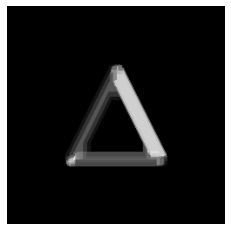

4 3 2


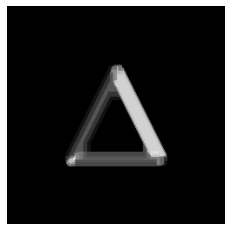

4 3 3


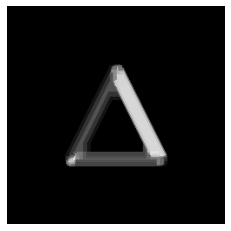

4 5 1


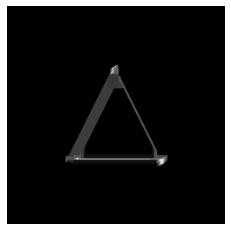

4 5 2


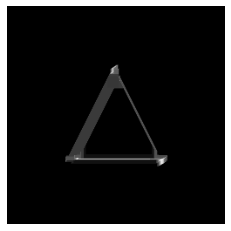

4 5 3


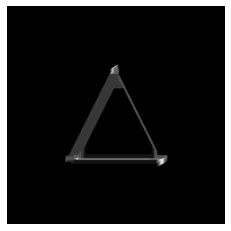

In [14]:

for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,np.pi/3,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(tri,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()


2 1 1


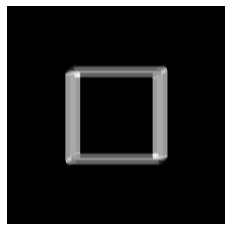

2 1 2


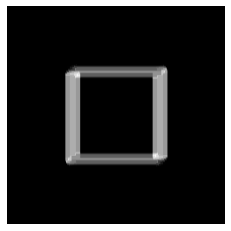

2 1 3


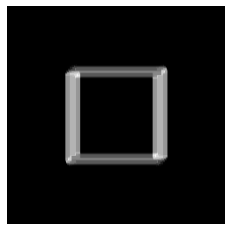

2 3 1


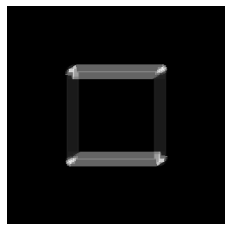

2 3 2


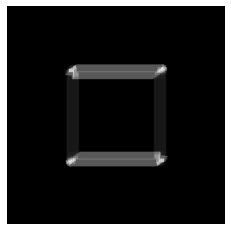

2 3 3


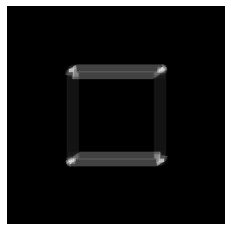

2 5 1


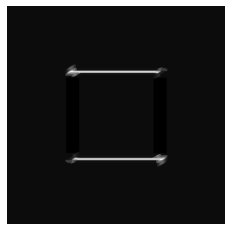

2 5 2


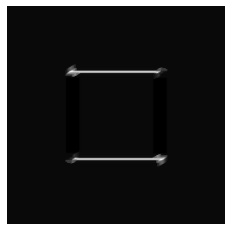

2 5 3


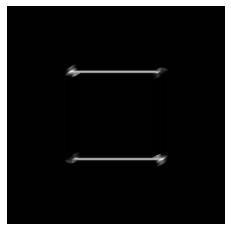

3 1 1


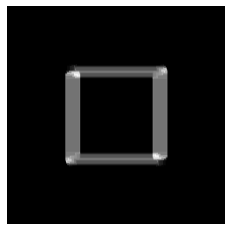

3 1 2


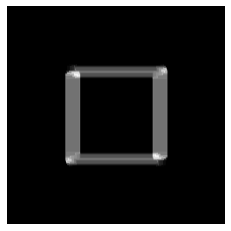

3 1 3


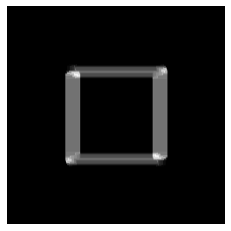

3 3 1


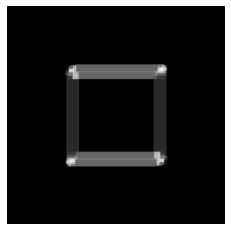

3 3 2


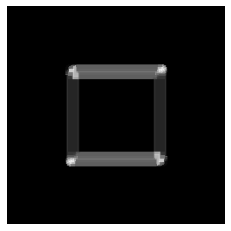

3 3 3


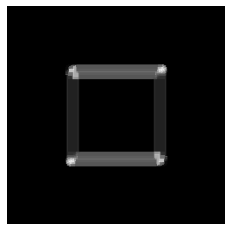

3 5 1


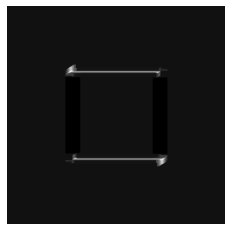

3 5 2


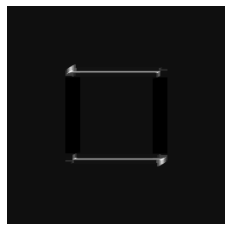

3 5 3


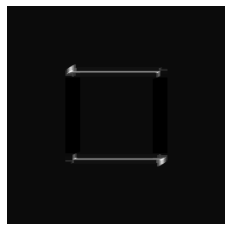

4 1 1


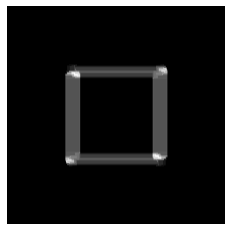

4 1 2


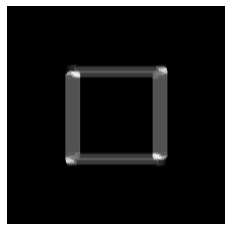

4 1 3


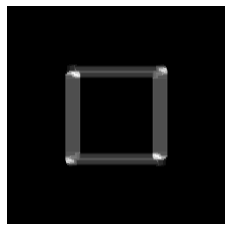

4 3 1


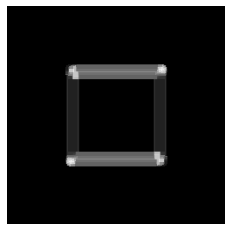

4 3 2


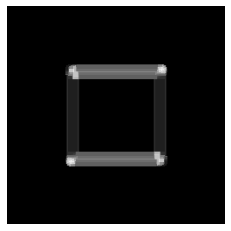

4 3 3


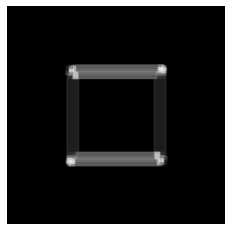

4 5 1


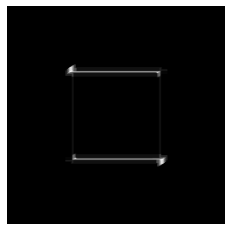

4 5 2


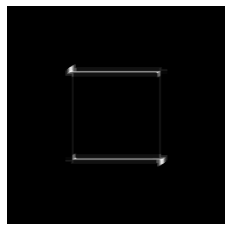

4 5 3


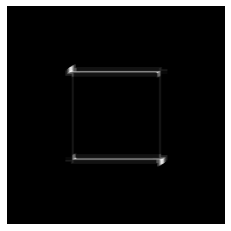

In [15]:

for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,np.pi/3,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(sq,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()

$\large{ \text{For 60 degree line detection, we get pretty good detection with Gabor filter with parameters as size of 11x11, }\\ \sigma = 3 , \lambda = 1 , \gamma = 3 , \theta = \frac{\pi}{3},  \psi = 0 }$

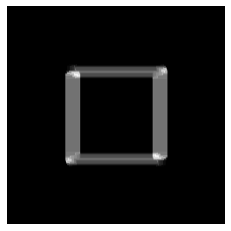

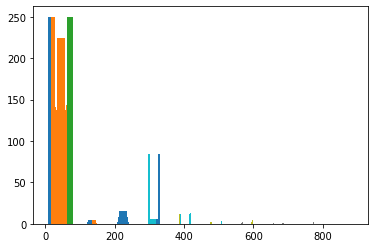

In [16]:
k = np.ones((11,11))/121
f = cv2.getGaborKernel((11,11),3,np.pi/3,1*np.pi/4,0.1*3,0)
ressq = cv2.filter2D(sq,-1,kernel=f)

ressq = cv2.dilate(ressq,kernel=k)

ressq = cv2.erode(ressq,kernel=k)

plt.axis('off')
plt.imshow(ressq,cmap = cm.Greys_r)
plt.show()


plt.hist(ressq)
plt.show()
##sum(ressq.reshape(-1))/sum(sq.reshape(-1))

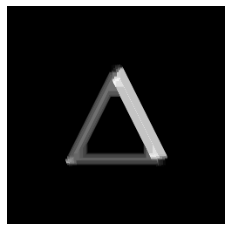

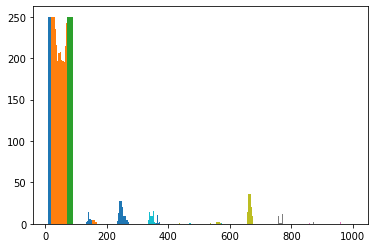

In [17]:
k = np.ones((11,11))/121
f = cv2.getGaborKernel((11,11),3,np.pi/3,1*np.pi/4,0.1*3,0)
restri = cv2.filter2D(tri,-1,kernel=f)

restri = cv2.dilate(restri,kernel=k)

restri = cv2.erode(restri,kernel=k)

plt.axis('off')
plt.imshow(restri,cmap = cm.Greys_r)
plt.show()

plt.hist(restri)
plt.show()
##sum(restri.reshape(-1))/sum(tri.reshape(-1))

### As can be seen from above two histograms value above 600 can be used as a threshold

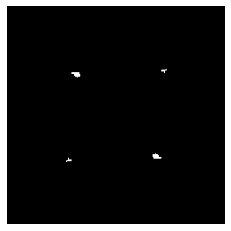

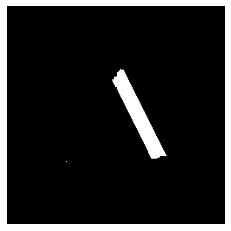

In [18]:
ressq[ressq<600]=0
ressq[ressq>0]=255

plt.axis('off')
plt.imshow(ressq,cmap = cm.Greys_r)
plt.show()

restri[restri<600]=0
restri[restri>0]=255

plt.axis('off')
plt.imshow(restri,cmap = cm.Greys_r)
plt.show()

## 120 Degree Gabor Filter

2 1 1


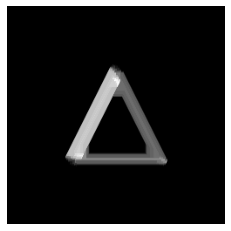

2 1 2


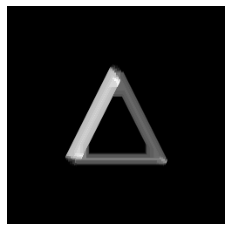

2 1 3


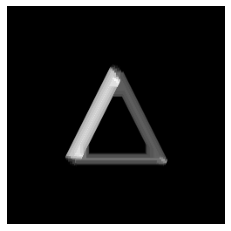

2 3 1


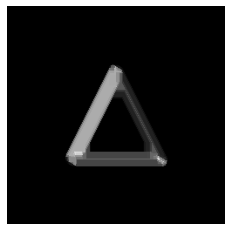

2 3 2


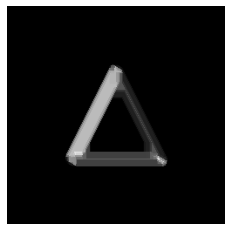

2 3 3


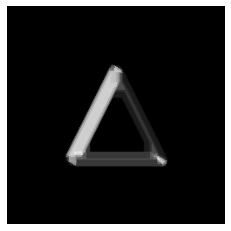

2 5 1


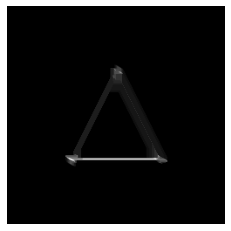

2 5 2


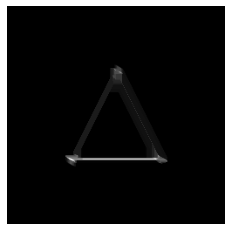

2 5 3


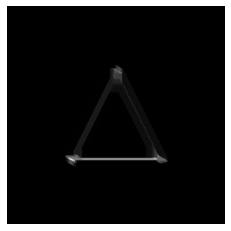

3 1 1


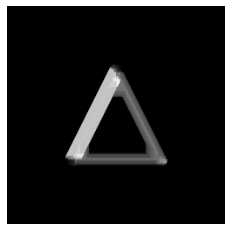

3 1 2


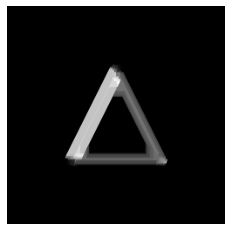

3 1 3


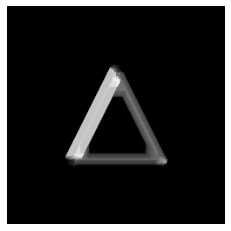

3 3 1


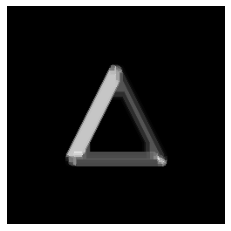

3 3 2


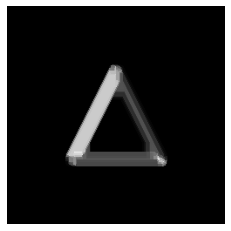

3 3 3


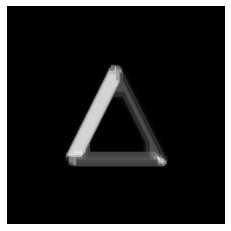

3 5 1


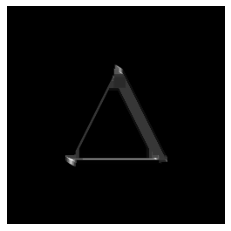

3 5 2


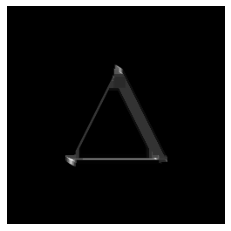

3 5 3


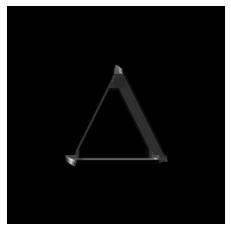

4 1 1


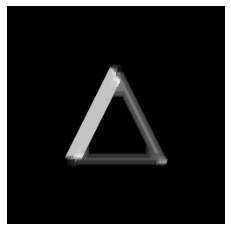

4 1 2


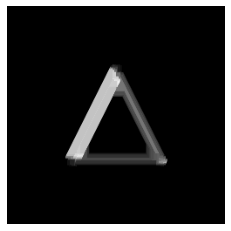

4 1 3


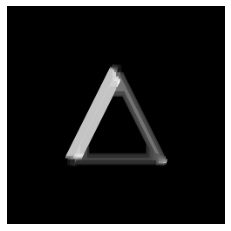

4 3 1


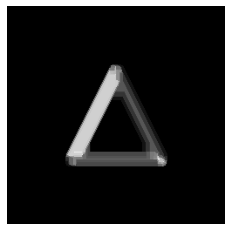

4 3 2


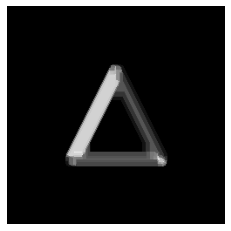

4 3 3


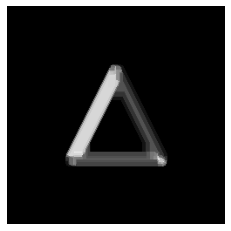

4 5 1


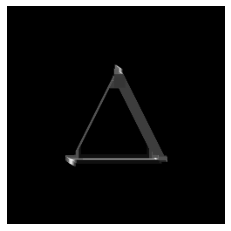

4 5 2


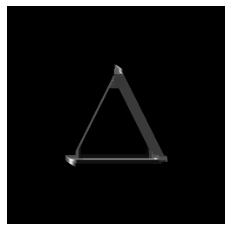

4 5 3


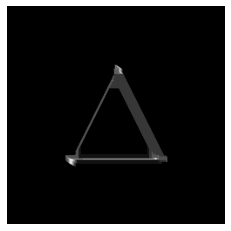

In [19]:

for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,np.pi/1.5,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(tri,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()


2 1 1


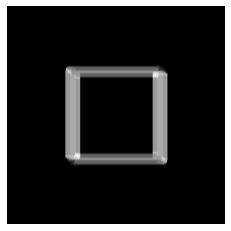

2 1 2


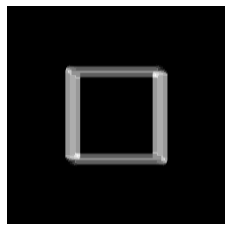

2 1 3


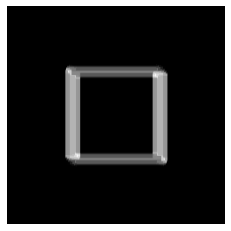

2 3 1


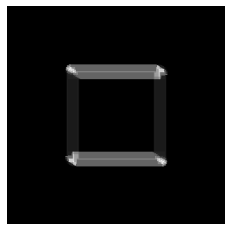

2 3 2


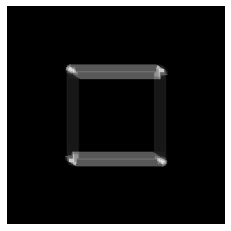

2 3 3


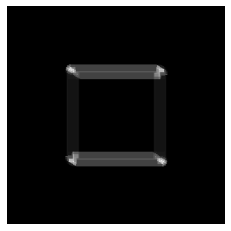

2 5 1


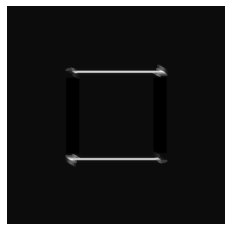

2 5 2


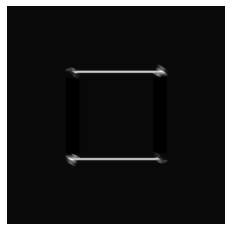

2 5 3


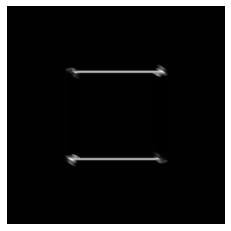

3 1 1


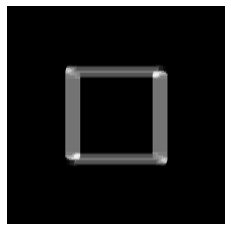

3 1 2


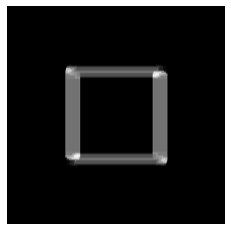

3 1 3


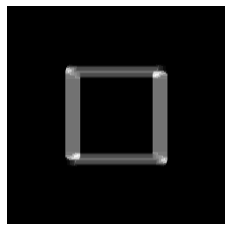

3 3 1


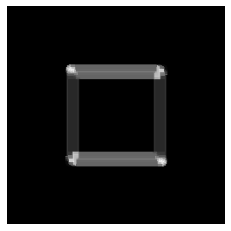

3 3 2


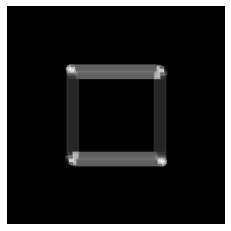

3 3 3


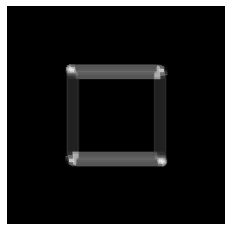

3 5 1


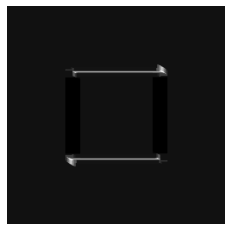

3 5 2


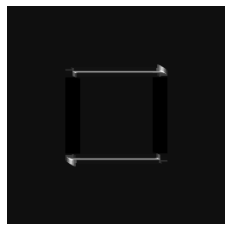

3 5 3


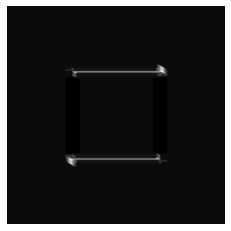

4 1 1


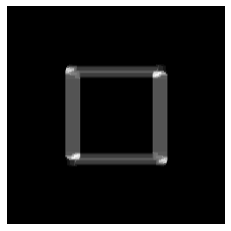

4 1 2


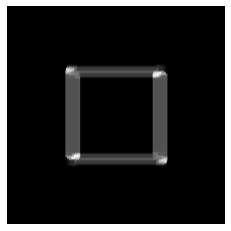

4 1 3


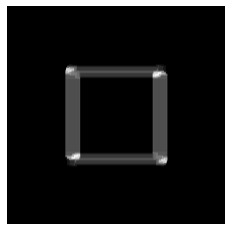

4 3 1


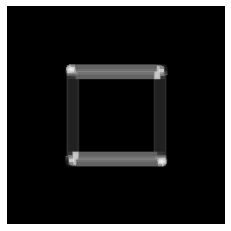

4 3 2


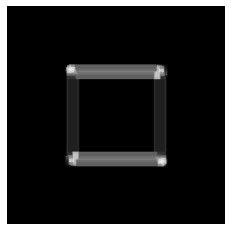

4 3 3


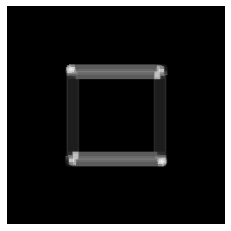

4 5 1


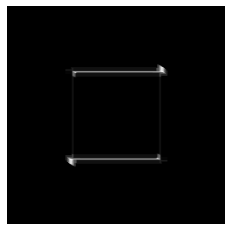

4 5 2


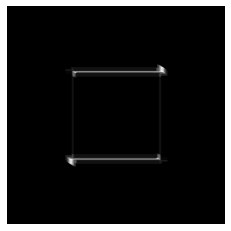

4 5 3


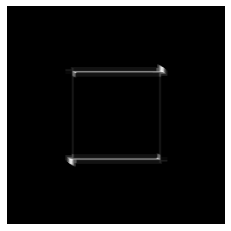

In [20]:

for sigma in range(2,5):
    for lamda in range(1,6,2):
        for gamma in range(1,4):
            f = cv2.getGaborKernel((11,11),sigma,np.pi/1.5,lamda*np.pi/4,0.1*gamma,0)
            res = cv2.filter2D(sq,-1,kernel=f)
            res = cv2.dilate(res,kernel=np.ones((11,11))/121)
            res = cv2.erode(res,kernel=np.ones((11,11))/121)
            print(sigma,lamda,gamma)
            plt.axis('off')
            plt.imshow(res,cmap = cm.Greys_r)
            plt.show()

$\large{ \text{For 120 degree line detection, we get pretty good detection with Gabor filter with parameters as size of 11x11, }\\ \sigma = 3 , \lambda = 1 , \gamma = 3 , \theta = \frac{2\pi}{3},  \psi = 0 }$

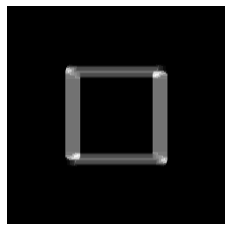

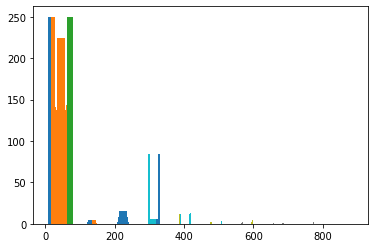

In [21]:
k = np.ones((11,11))/121
f = cv2.getGaborKernel((11,11),3,np.pi/1.5,1*np.pi/4,0.1*3,0)
ressq = cv2.filter2D(sq,-1,kernel=f)

ressq = cv2.dilate(ressq,kernel=k)

ressq = cv2.erode(ressq,kernel=k)

plt.axis('off')
plt.imshow(ressq,cmap = cm.Greys_r)
plt.show()


plt.hist(ressq)
plt.show()

# sum(ressq.reshape(-1))/sum(sq.reshape(-1))

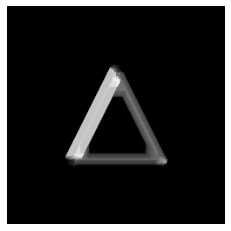

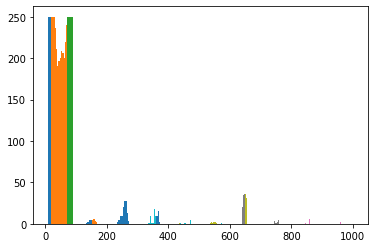

In [22]:
k = np.ones((11,11))/121
f = cv2.getGaborKernel((11,11),3,np.pi/1.5,1*np.pi/4,0.1*3,0)
restri = cv2.filter2D(tri,-1,kernel=f)

restri = cv2.dilate(restri,kernel=k)

restri = cv2.erode(restri,kernel=k)

plt.axis('off')
plt.imshow(restri,cmap = cm.Greys_r)
plt.show()

plt.hist(restri)
plt.show()

##sum(restri.reshape(-1))/sum(tri.reshape(-1))

### As can be seen from above two histograms value above 600 can be used as a threshold

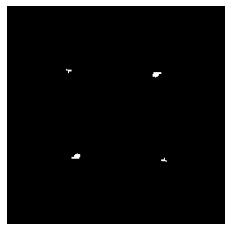

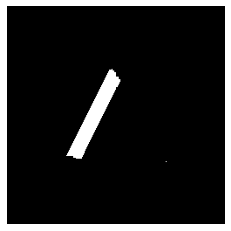

In [23]:
ressq[ressq<600]=0
ressq[ressq>0]=255
plt.axis('off')
plt.imshow(ressq,cmap = cm.Greys_r)
plt.show()

restri[restri<600]=0
restri[restri>0]=255
plt.axis('off')
plt.imshow(restri,cmap = cm.Greys_r)
plt.show()

In [24]:
##Predicts the shape of passed image using 0,60,90,120 Gabor filters
def predictor(shp,b):
    ##print(shp.shape,shp)
    
    denom = shp.shape[0]**2  ##Calculate no of pixels to use for normalization
    k = np.ones((11,11))/121 ##Filter to be used in erode and dilate operations
    
    ## 0 , 60 , 90 , 120 Gabor filters with parameters as determined above
    g0 = cv2.getGaborKernel((11,11),2,0,5*np.pi/4,0.1*1,0)
    g60 = cv2.getGaborKernel((11,11),3,np.pi/3,1*np.pi/4,0.1*3,0)
    g90 = cv2.getGaborKernel((11,11),2,np.pi/2,1*np.pi/4,0.1*3,0)
    g120 = cv2.getGaborKernel((11,11),3,np.pi/1.5,1*np.pi/4,0.1*3,0)
    
    
    ## Applies the Gabor filters on passed image and then dilates , erodes and threshold to produce final result
    res0 = cv2.filter2D(shp,-1,kernel=g0)
    res0 = cv2.dilate(res0,kernel=k)
    res0 = cv2.erode(res0,kernel=k)
#     plt.hist(res0)
#     plt.show()
    ##print(np.unique(res0))
    res0[res0<600]=0
    res0[res0>0]=255
    
    res60 = cv2.filter2D(shp,-1,kernel=g60)
    res60 = cv2.dilate(res60,kernel=k)
    res60 = cv2.erode(res60,kernel=k)
    ##print(np.unique(res60))
    res60[res60<600]=0
    res60[res60>0]=255
    
    res90 = cv2.filter2D(shp,-1,kernel=g90)
    res90 = cv2.dilate(res90,kernel=k)
    res90 = cv2.erode(res90,kernel=k)
    ##print(np.unique(res90))
    
    res120 = cv2.filter2D(shp,-1,kernel=g120)
    res120 = cv2.dilate(res120,kernel=k)
    res120 = cv2.erode(res120,kernel=k)
    ##print(np.unique(res120))
    res120[res120<600]=0
    res120[res120>0]=255
    
    
    ## Plots the final result of Gabor filters on the image if True is passed as value for b
    if b:
        plt.imshow(res0,cmap=cm.Greys_r)
        plt.title('Vertical')
        plt.axis('off')
        plt.show()
        plt.imshow(res60,cmap=cm.Greys_r)
        plt.title('60 Degree')
        plt.axis('off')
        plt.show()
        plt.imshow(res90,cmap=cm.Greys_r)
        plt.title('Horizontal')
        plt.axis('off')
        plt.show()
        plt.imshow(res120,cmap=cm.Greys_r)
        plt.title('120 Degree')
        plt.axis('off')
        plt.show()

## Prints the total normalized value of result image's pixel value. Used below as cutoff value in whether significant or not
#     print(sum(res0.reshape(-1))/denom)
#     print(sum(res60.reshape(-1))/denom)
#     print(sum(res90.reshape(-1))/denom)
#     print(sum(res120.reshape(-1))/denom)

## Above commented code was used to figure the 0.5 cut off value to determine whether significant line found
    
    ## Identifies square if horizontal and vertical filter have significant output and 60 , 120 does not
    if(sum(res0.reshape(-1))/denom > 0.5 and sum(res90.reshape(-1))/denom > 0.5 and sum(res60.reshape(-1))/denom < 0.5 and sum(res120.reshape(-1))/denom < 0.5 ):
        name = 'Square'
    ## Identifies triangle if horizontal ,60 and 120 filter have significant output and vertical does not
    elif(sum(res90.reshape(-1))/denom > 0.5 and sum(res60.reshape(-1))/denom > 0.5 and sum(res120.reshape(-1))/denom > 0.5):
        name = 'Triangle'
    ## Identifies Right angled triangle if horizontal and vertical filter have significant output and either 60 or 120 does too
    elif(sum(res90.reshape(-1))/denom > 0.5 and (sum(res60.reshape(-1))/denom > 0.5 or sum(res120.reshape(-1))/denom > 0.5) and sum(res0.reshape(-1))/denom > 0.5):
        name = 'Triangle'
    else:
        name = 'Unknown Shape'
    
    if b:
        plt.imshow(shp,cmap=cm.Greys_r)
        plt.axis('off')
        plt.title(name)
        plt.show()

    return name

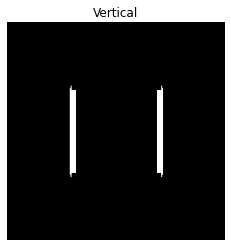

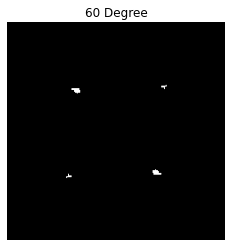

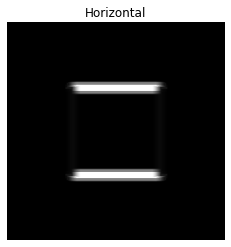

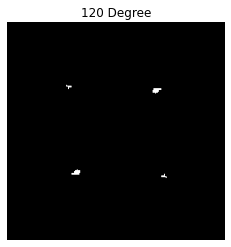

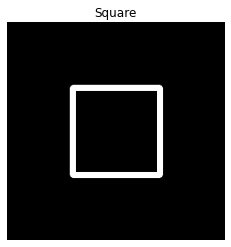

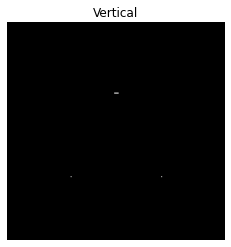

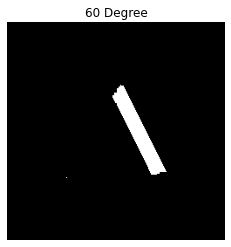

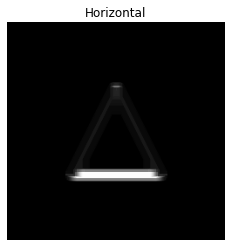

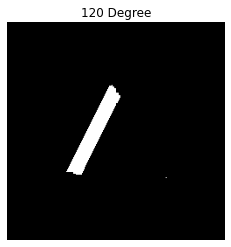

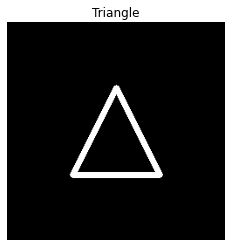

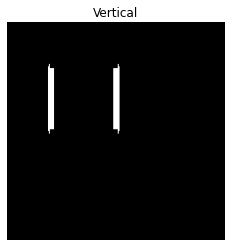

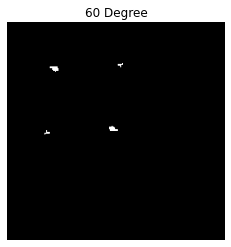

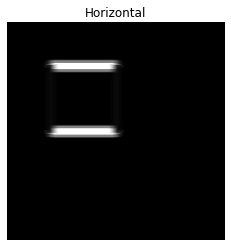

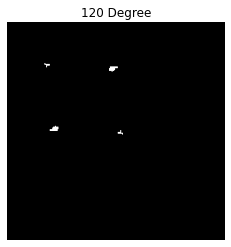

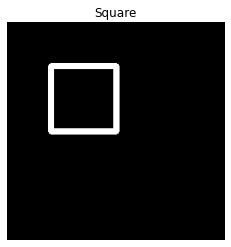

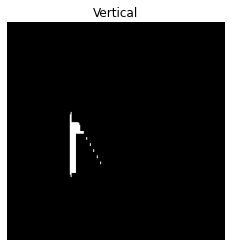

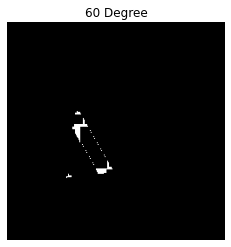

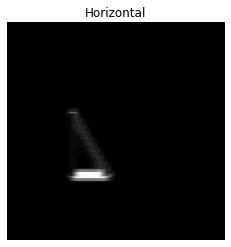

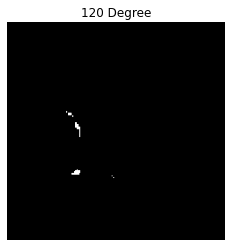

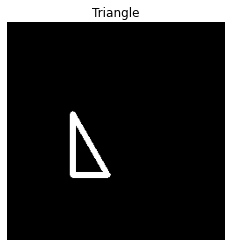

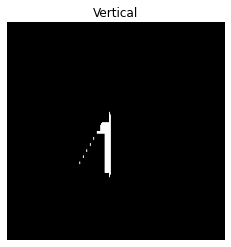

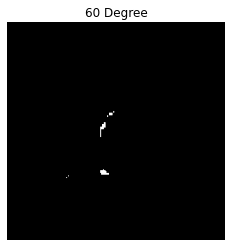

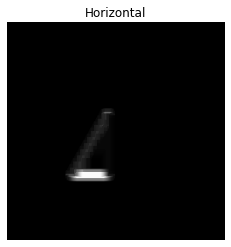

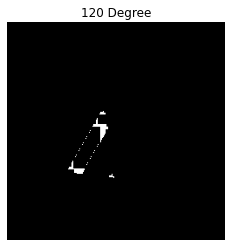

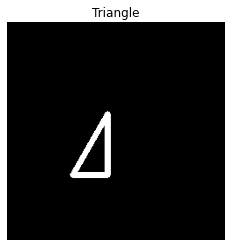

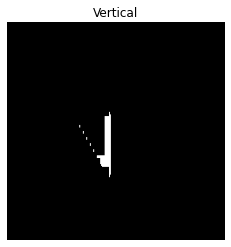

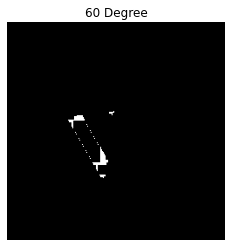

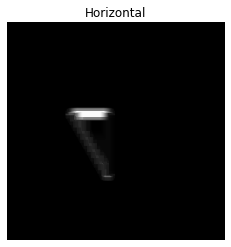

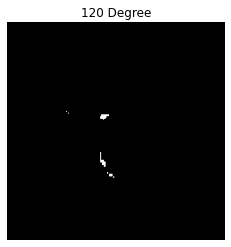

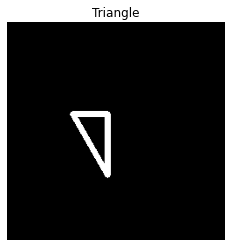

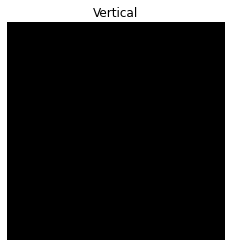

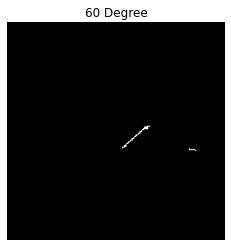

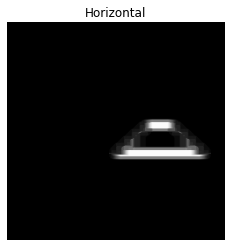

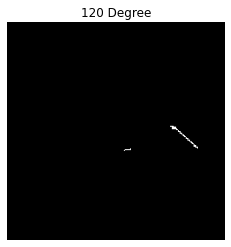

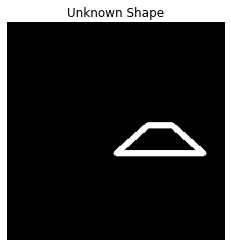

In [25]:
_ = predictor(sq,True)  ##Square made at beginning

_ = predictor(tri,True)  ##Triangle made at beginning


sq1 = np.zeros(shape = [250,250]) ## Smaller displaced square
cv2.rectangle(sq1,pt1=(50,50),pt2=(125,125),color=255,thickness = 5)
_ = predictor(sq1,True)

tri1 = np.zeros(shape = [250,250]) ## Right sided Right angle triangle
cv2.polylines(tri1,[np.array([[75,175],[115,175],[75,105]],np.int32).reshape((-1,1,2))],True,color=255,thickness = 5)
_ = predictor(tri1,True)

tri2 = np.zeros(shape = [250,250]) ##Left Sided Right Angle Triangle
cv2.polylines(tri2,[np.array([[75,175],[115,175],[115,105]],np.int32).reshape((-1,1,2))],True,color=255,thickness = 5)
_ = predictor(tri2,True)

tri3 = np.zeros(shape = [250,250]) ##Inverted Right Angle Triangle
cv2.polylines(tri3,[np.array([[75,105],[115,105],[115,175]],np.int32).reshape((-1,1,2))],True,color=255,thickness = 5)
_ = predictor(tri3,True)


trapezium = np.zeros(shape = [250,250])  ##Trapezium as example of unknown shape
cv2.polylines(trapezium,[np.array([[125,150],[225,150],[189,118],[161,118]],np.int32).reshape((-1,1,2))],True,color=255,thickness = 5)
_ = predictor(trapezium,True)

# (B)

In [26]:
def square(c):  ##Function to generate square in cell required to create paradigm. c specifies red or blue color
    square = np.zeros(shape = [250,250,3])
    if c== 'red':
        cv2.rectangle(square,pt1=(75,75),pt2=(175,175),color=(255,0,0),thickness = 5)
    else:
        cv2.rectangle(square,pt1=(75,75),pt2=(175,175),color=(0,0,255),thickness = 5)
    return square

def triangle(c): ##Function to generate triangle in cell required to create paradigm. c specifies red or blue color
    triangle = np.zeros(shape = [250,250,3])
    vertex = np.array([[75,175],[175,175],[125,75]],np.int32).reshape((-1,1,2))
    if(c=='red'):
        cv2.polylines(triangle,[vertex],True,color=(255,0,0),thickness = 5)
    else:
        cv2.polylines(triangle,[vertex],True,color=(0,0,255),thickness = 5)
    return triangle

In [27]:
##Generates appropriate Paradigm for Feature or Conjuction Search
## Takes type of search and no of objects as parameter

def paradgen(srchtype,nshapes,b):
    search = ['Conjuction','Feature']
    paradigm = np.zeros(shape = [3750,3750,3]) ##Creates a 3750x3750 size paradigm
    shape=['square','triangle']
    color = ['red','blue']
    if(srchtype==1): ##Feature Search
        n = np.random.randint(0,2) ## To decide whether we have Color or shape as feature to identify 

        if(n==1):##Odd Colour

            s = shape[np.random.randint(0,2)] ## Chooses square or triangle randomly
            samecol = color[np.random.randint(0,2)] ##Chooses color that all objects except one will have
            oddcol = 'blue' if samecol!='blue' else 'red'
            locs = [x for x in range(225)] ## Generates a list from 0 to 224 to choose object location 
            np.random.shuffle(locs) ## Shuffles the location list
            locs = locs[:nshapes] ## Choose first N locations where N is no of objects
            oddloc = locs[np.random.randint(0,nshapes)] ##Choose odd object location from above chosen locations
            
            for i in locs: ## For each location 
                x = int(i/15) ## Calculate cell coordinates
                y = int(i%15) ## Calculates cell coordinates
                if i!= oddloc: ## If not odd object location then assign same object
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square(samecol) if s=='square' else triangle(samecol)
                
                else: ## If Odd object location then assign odd object
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square(oddcol) if s=='square' else triangle(oddcol)
                      
        else: ##Odd Shape
            
            col = color[np.random.randint(0,2)]
            sameshp = shape[np.random.randint(0,2)]
            oddshp = 'square' if sameshp!='square' else 'triangle'
            locs = [x for x in range(225)]
            np.random.shuffle(locs)
            locs = locs[:nshapes]
            oddloc = locs[np.random.randint(0,nshapes)]
            
            for i in locs:
                x = int(i/15)
                y = int(i%15)
                if i!= oddloc:
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square(col) if oddshp!='square' else triangle(col)
                else:
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square(col) if oddshp=='square' else triangle(col)
                    
    else: ##Conjuction Search
        
        sameshp = shape[np.random.randint(0,2)] ## Choose a shape randomly
        oddshp = 'square' if sameshp!='square' else 'triangle' ## Determine odd object shape
        samecol = color[np.random.randint(0,2)] ##Choose a color randomly
        oddcol = 'blue' if samecol!='blue' else 'red' ##Determine odd color 
        ntri = np.random.randint(4,nshapes-3) ## Determine no of triangles in paradigm
        nsq = nshapes - ntri ## No of squares in Paradigm
        locs = [x for x in range(225)] ##Locations in paradigm
        np.random.shuffle(locs) ##Shuffles location list
        locs = locs[:nshapes] ## Choose first N locations
        sqloc = locs[:nsq] ##Square object locations
        triloc = locs[nsq:] ##Triangle object locations
        ##print(oddcol,oddshp)
        oddloc = sqloc[np.random.randint(0,nsq)] if oddshp == 'square' else triloc[np.random.randint(0,ntri)] ## Odd object location
        
        ##Below code same as above adds at each location choosen corresponding object
        if(oddshp=='square'):
            for i in sqloc:
                x = int(i/15)
                y = int(i%15)
                if i!= oddloc:
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square(samecol)
                else:
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square(oddcol) 
            
            np.random.shuffle(triloc)
            blueloc = triloc[:np.random.randint(2,len(triloc)-1)]
            redloc = [x for x in triloc if x not in blueloc]
            for i in blueloc:
                x = int(i/15)
                y = int(i%15)
                paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = triangle('blue')
            for i in redloc:
                x = int(i/15)
                y = int(i%15)
                paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = triangle('red')
                
        else:
            
            for i in triloc:
                x = int(i/15)
                y = int(i%15)
                if i!= oddloc:
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = triangle(samecol)
                else:
                    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = triangle(oddcol) 
                    
            np.random.shuffle(sqloc)
            blueloc = sqloc[:np.random.randint(2,len(sqloc)-1)]
            redloc = [x for x in sqloc if x not in blueloc]
            for i in blueloc:
                x = int(i/15)
                y = int(i%15)
                paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square('blue')
            for i in redloc:
                x = int(i/15)
                y = int(i%15)
                paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = square('red')
    
    ## Displays Paradigm if True is passed to b
    if b:    
        fig, ax = plt.subplots(figsize=(12,12))
        ax.imshow(paradigm,aspect='equal')
        ax.axis('off')
        ax.set_title(search[srchtype]+' Search Paradigm')
        plt.show()
        
    return paradigm,locs   ##Returns paradigm and object locations

### 0 for Conjuction search and 1 for Feature search
### No of shapes for good output to be 10 to 120 as there are 225 object points in a 3750x3750 image
### Atleast 8 for Conjuction search

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


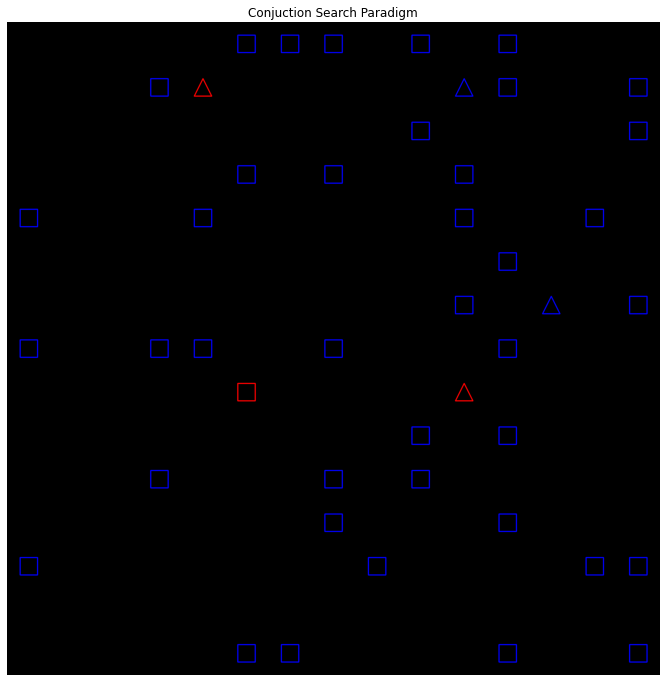

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


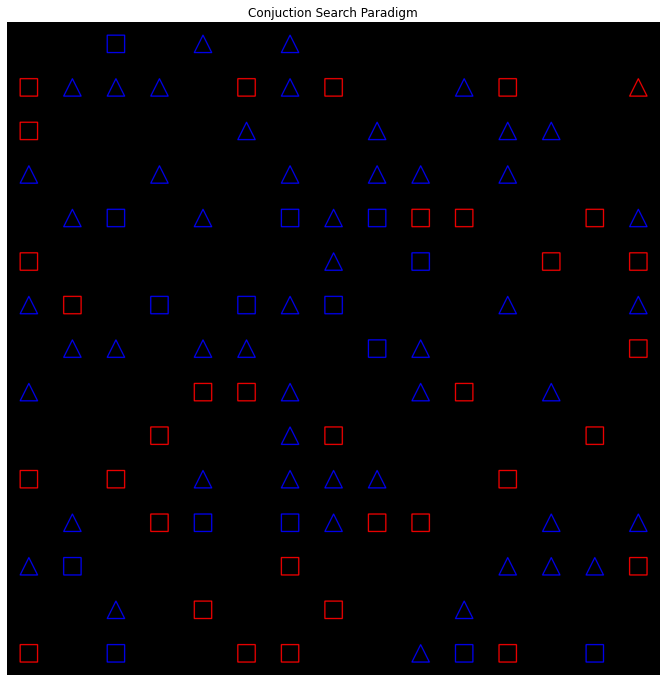

In [28]:
paradigm,locs = paradgen(0,45,True)
paradigm,locs = paradgen(0,100,True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


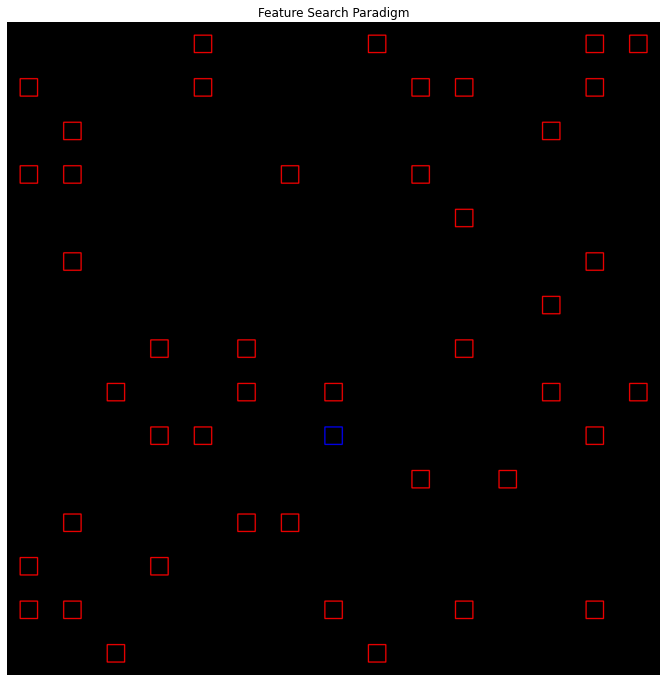

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


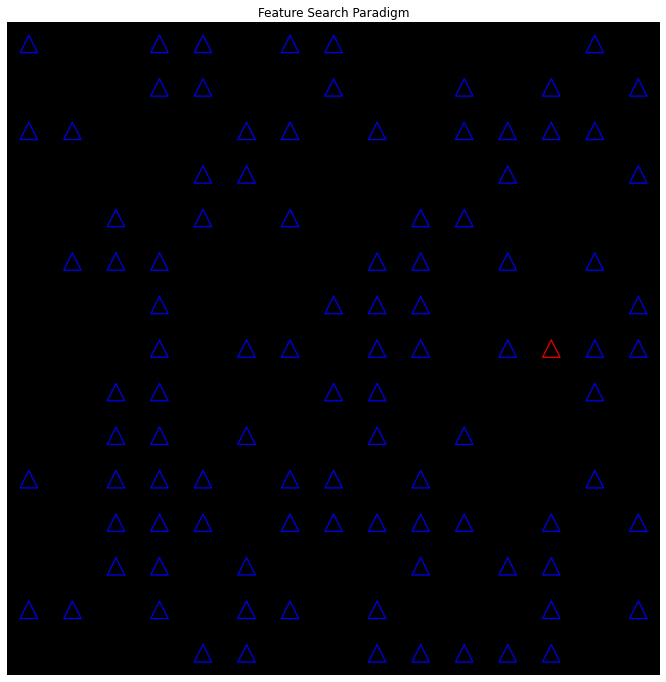

In [29]:
paradigm,locs = paradgen(1,45,True)
paradigm,locs = paradgen(1,100,True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


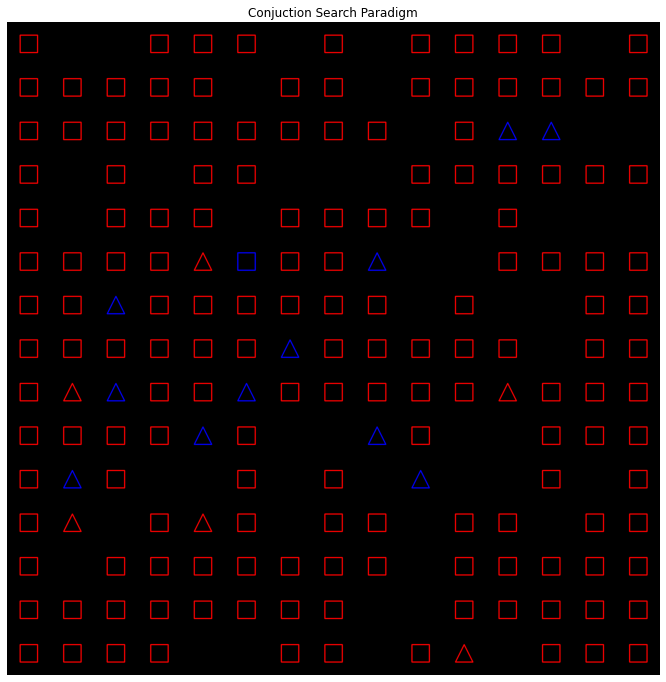

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


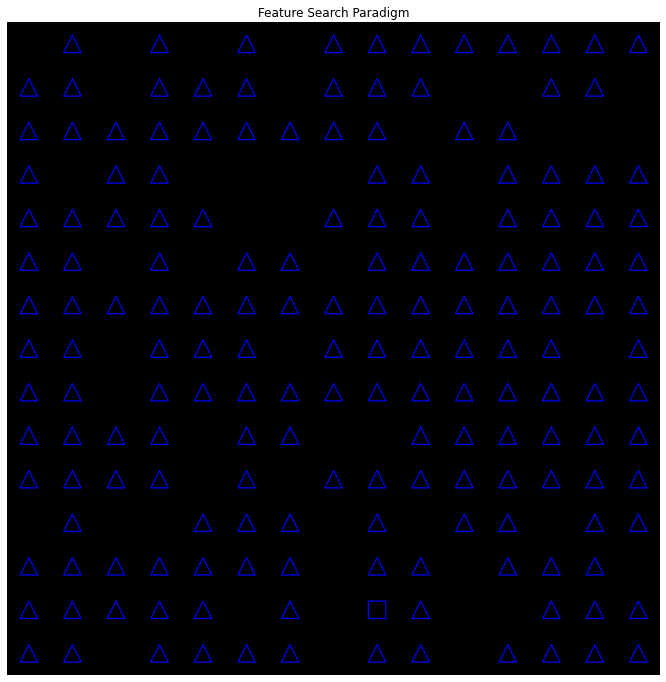

In [30]:
paradigm,locs = paradgen(0,175,True)
paradigm,locs = paradgen(1,175,True)

# (C)

In [31]:
##Takes Paradigm and locations as Parameter and determines each object's shape and color returns this data as dictionary
def getfeatures(paradigm,locs):
    objcolor = {}
    objshape = {}
    
    for i in locs:
        x = int(i/15)## Calculates Coordinates
        y = int(i%15)## Calculates Coordinates
        obj = paradigm[x*250:(x+1)*250,y*250:(y+1)*250,:] ## Get the cell image
        if (len(np.unique(obj[:,:,0])) == 2): ## Checks if Object color is red or blue
            objcolor[i] = 'red'
            objshape[i] = predictor(obj[:,:,0],False) ## Determines object shape
        else:
            objcolor[i] = 'blue'
            objshape[i] = predictor(obj[:,:,2],False) ## Determines object shape
        
    return objcolor,objshape
                                   

In [32]:
## Function takes the Paradigm and location of odd object determined and marks it using a green square in Paradigm
def markoddloc(paradigm,oddloc):
    x = int(oddloc/15)
    y = int(oddloc%15)
    obj = paradigm[x*250:(x+1)*250,y*250:(y+1)*250,:]
    cv2.rectangle(obj,pt1 = (50,50),pt2=(200,200),color=(0,255,0),thickness=5)
    paradigm[x*250:(x+1)*250,y*250:(y+1)*250] = obj
    fig, ax = plt.subplots(figsize=(12,12))
    ax.imshow(paradigm,aspect='equal')
    ax.axis('off')
    ax.set_title('Odd Object Marked')
    plt.show()

## Feature Search Example

In [33]:
def featuresearch(objcolor,objshape):
    time.sleep(0.05) ##Processing Delay
    ncolor = len(set(list(objcolor.values()))) ##Determines whether only blue or only red or both
    nshape = len(set(list(objshape.values()))) ##Determines whether only square or only triangle or both
    if(ncolor == 1): ## If only one color then odd object has different shape than rest
        ##Determines count and first index of square and triangle
        shape, index , count = np.unique(list(objshape.values()),return_counts=True,return_index = True)
        ##returns location of odd object in Paradigm
        if count[0] == 1 :
            return list(objshape.keys())[index[0]]
        else:
            return list(objshape.keys())[index[1]]
    elif(nshape==1):
        color, index , count = np.unique(list(objcolor.values()),return_counts=True,return_index = True)
        if count[0] == 1 :
            return list(objcolor.keys())[index[0]]
        else:
            return list(objcolor.keys())[index[1]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


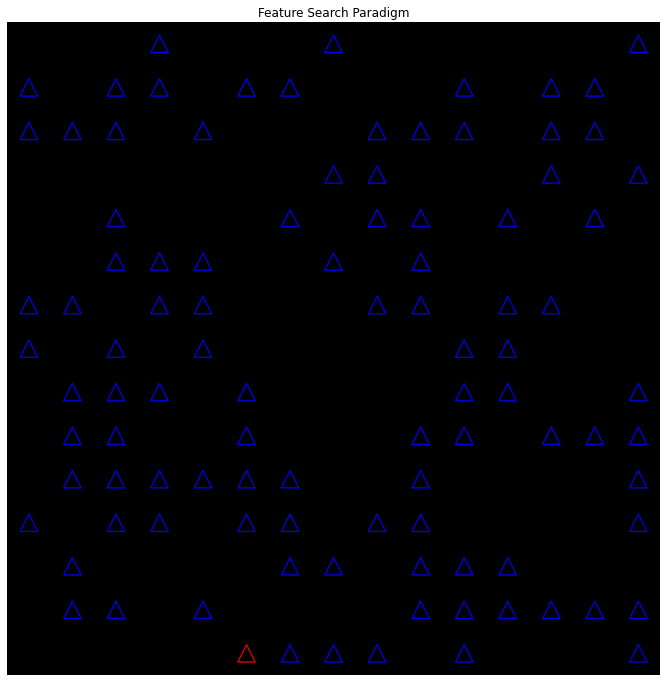

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


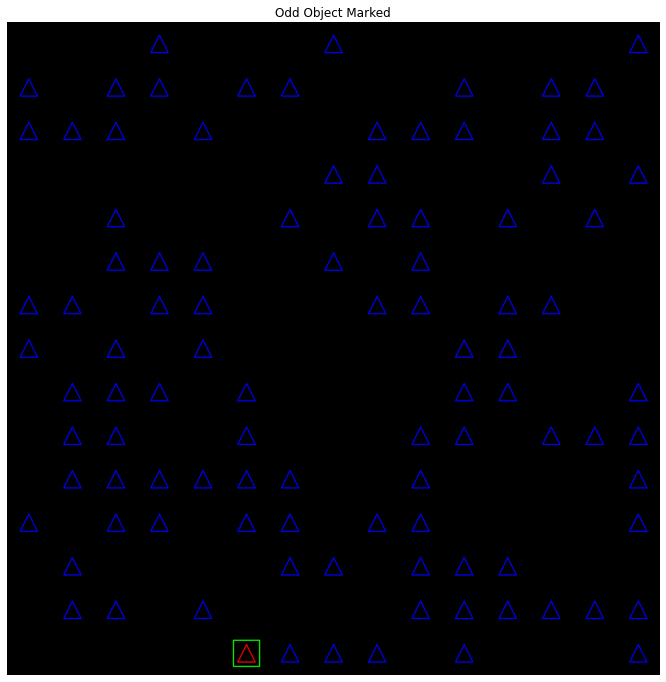

Search Time : 0.05080890655517578 s


In [34]:
(paradigm , locs) = paradgen(1,100,True)
objcolor , objshape = getfeatures(paradigm,locs)
## Measures time taken in search
s = time.time()
oddloc = featuresearch(objcolor,objshape)
tot = time.time() - s

markoddloc(paradigm,oddloc)
print('Search Time :',tot,'s')

In [35]:
## Used to observe effect of no of objects on Search time
fesrchtime = {}
for i in range(8,176):
    (paradigm , locs) = paradgen(1,i,False)
    objcolor , objshape = getfeatures(paradigm,locs)
    s = time.time()
    oddloc = featuresearch(objcolor,objshape)
    fesrchtime[i] = time.time() - s

## Conjuction Search Example

In [36]:
def conjuctionsearch(objcolor,objshape):
    time.sleep(0.05) ##Processing Delay
   
    ## Lists to count no of objects of each type
    triblue = []
    trired = []
    sqblue = []
    sqred = []
    ##print(objcolor,objshape,end='\n')
    for key,value in objcolor.items():
        time.sleep(0.02) ##Integration delay
        if (value == 'blue' and objshape[key]== 'Triangle'):
            triblue.append(key)
        elif(value == 'red' and objshape[key]== 'Triangle'):
            trired.append(key)
        elif(value == 'red' and objshape[key]== 'Square'):
            sqred.append(key)
        elif(value == 'blue' and objshape[key]== 'Square'):
            sqblue.append(key)
            
    ##print(len(trired),len(triblue),len(sqred),len(sqblue))
    
    ##Determines odd object features and returns it location in Paradigm
    if(len(triblue)==1):
        return triblue[0]
    elif(len(trired)==1):
        return trired[0]
    elif(len(sqblue)==1):
        return sqblue[0]
    elif(len(sqred)==1):
        return sqred[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


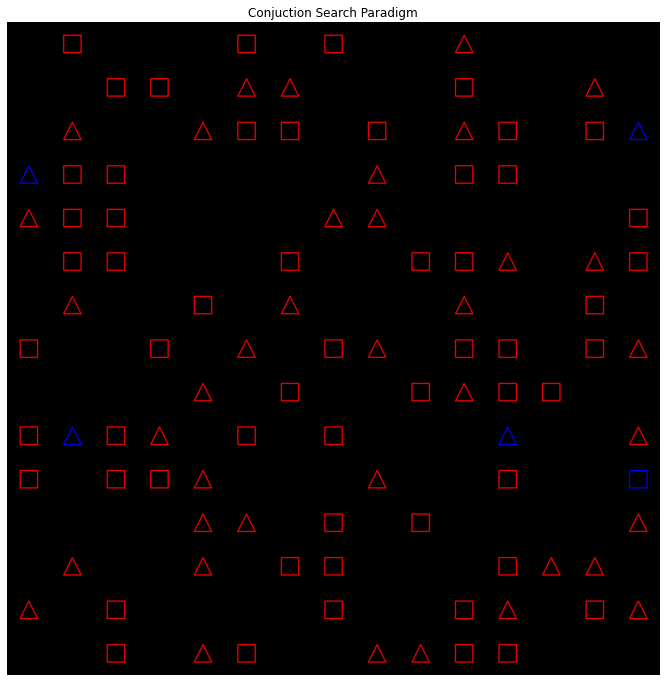

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


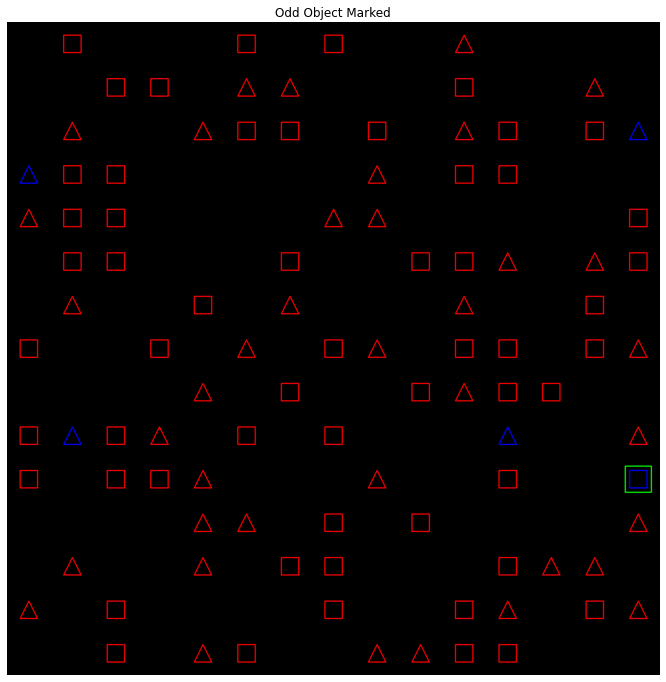

Search Time : 2.0655312538146973 s


In [37]:
(paradigm , locs) = paradgen(0,100,True)
objcolor , objshape = getfeatures(paradigm,locs)
s = time.time()
oddloc = conjuctionsearch(objcolor,objshape)
tot = time.time() - s
markoddloc(paradigm,oddloc)
print('Search Time :',tot,'s')

In [38]:
##Used to observe effect of no of objects on search time
consrchtime = {}
for i in range(8,176):
    (paradigm , locs) = paradgen(0,i,False)
    objcolor , objshape = getfeatures(paradigm,locs)
    s = time.time()
    oddloc = conjuctionsearch(objcolor,objshape)
    consrchtime[i] = time.time() - s

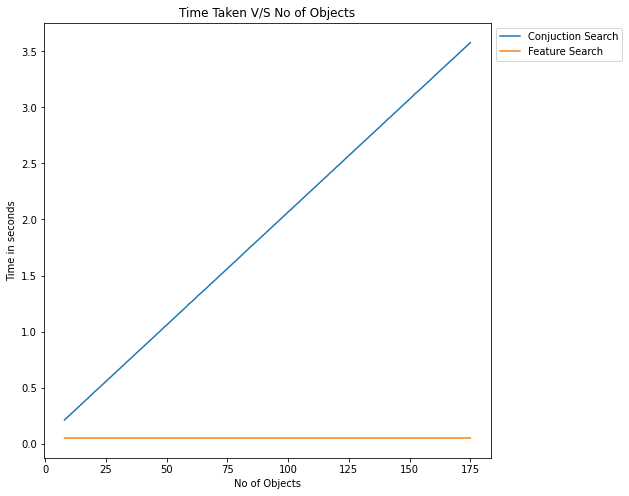

In [39]:
##Plots the search time against no of objects for Feature and Conjucture Search
fig, ax = plt.subplots(1,figsize=(8,8))
ax.plot(list(consrchtime.keys()),list(consrchtime.values()),label = 'Conjuction Search')
ax.plot(list(fesrchtime.keys()),list(fesrchtime.values()),label = 'Feature Search')
ax.set_xlabel('No of Objects')
ax.set_ylabel('Time in seconds')
ax.set_title('Time Taken V/S No of Objects')
ax.legend(bbox_to_anchor = (1, 1))
print()

### There is no significant change in search time during feature search as no of objects increase

### Search time in Conjuction search appears to increase linearly with increase in no of objects